$$\require{mhchem}$$  
# Oscillations in dynamic systems

## Brusselator model:
Source: https://en.wikipedia.org/wiki/Brusselator .

Brusselator is an example of autocatalytic reaction, showing oscillatory behaviour in specific conditions.

It is described by following chemical reactions:
$$
\begin{aligned}
\ce {A&->X}\\
\ce {2X + Y&->3X}\\
\ce {B + X&->Y + D}\\
\ce {X&->E}
\end{aligned}
$$
Where concentrations of $\ce{[A]}$ and $\ce{[B]}$ are fixed in time. 

#### Importing necessary modules:

In [1]:
import numpy as np
import matplotlib.pyplot as p
from chemreact import models

#### Defining chemical reactions and initial concentrations:
rate constants are equal to 1 by default

In [2]:
chem = models.Chemistry()
chem.reaction('A=>X')
chem.reaction('2X+Y=>3X')
chem.reaction('B+X=>Y+D')
chem.reaction('X=>E')

chem.initial_concentrations(A=1, B=3, X=1, Y=1)

##### Setting concentrations of $A$ and $B$ to constants:

In [3]:
#Getting the order of variables in matrix:
list(chem.variables)

['A', 'B', 'D', 'E', 'X', 'Y']

In [4]:
#Setting 0th and 1st variables coefficients to 0:
chem.stoichiometry[:,1] =np.zeros(4)
chem.stoichiometry[:,0] =np.zeros(4)

#### Running the simulation:

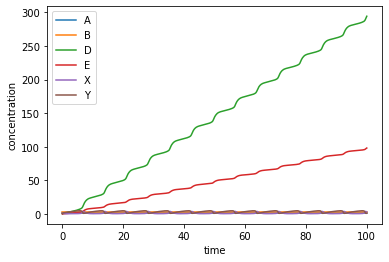

run time: 0.384s


In [5]:
chem.time_stop = 100
chem.run()

#### Plotting selected species:

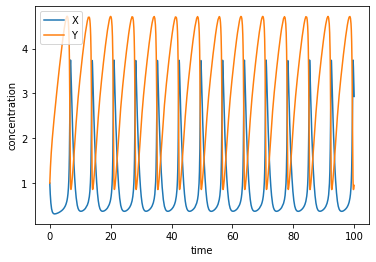

In [6]:
chem.plot('X', 'Y')

#### Plotting concentration of X vs concentration of Y

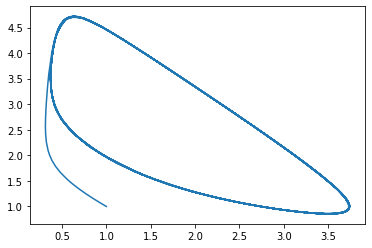

In [7]:
p.plot(chem.solution['X'], chem.solution['Y'])

## Alternative conditions: transition to stable regime

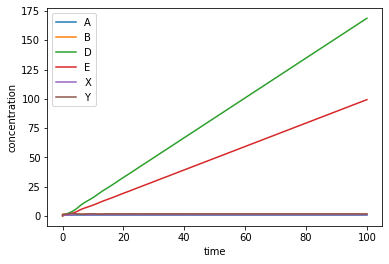

run time: 0.046s


In [8]:
chem.initial_concentrations(A=1, B=1.7, X=1, Y= 1)
chem.run()

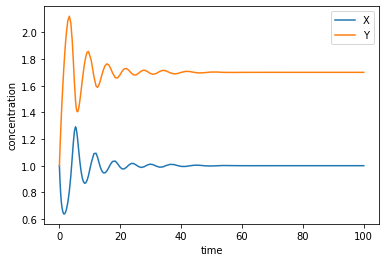

In [9]:
chem.plot('X', 'Y')

#### Plotting concentration of X vs concentration of Y

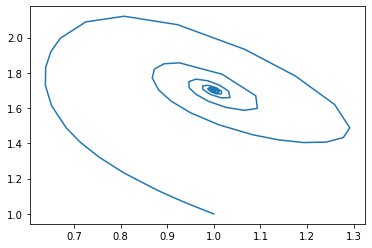

In [10]:
p.plot(chem.solution['X'], chem.solution['Y'])

#### Interactive plot

In [11]:
from ipywidgets import interact

In [12]:
@interact
def f(A=(0,3,0.01),B=(0,3,0.01), k=(0,3,0.01)):
    chem.initial_concentrations(A=A, B=B, X=1, Y= 1)
    chem.parameters[0]=k
    chem.run(plot=False)
    chem.plot('X', 'Y')
    #p.plot(chem.solution['X'], chem.solution['Y'])

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, step=0.01), FloatSlider(value=1.0, desc…

### Brusselator in CSTR:
Oscillations can naturally occur in continous reactors. This example demonstrates Brusselator in continuous stirred reactor with constant feed of reagents:

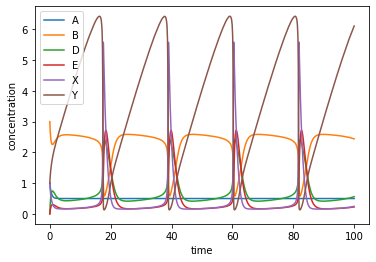

run time: 0.257s


In [13]:
r1 = models.CSTR()
c1 = models.Chemistry()
c1.reaction('A=>X')
c1.reaction('2X+Y=>3X')
c1.reaction('B+X=>Y+D')
c1.reaction('X=>E')
r1.chemistry = c1
r1.inlet(A=1, B=3, X=1, Y=1)
r1.q=np.array((1,1,1,1,0,0))
r1.run()

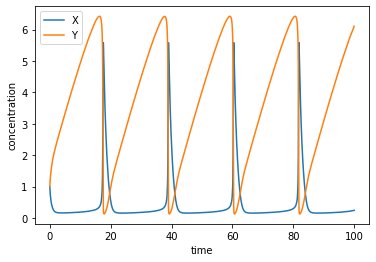

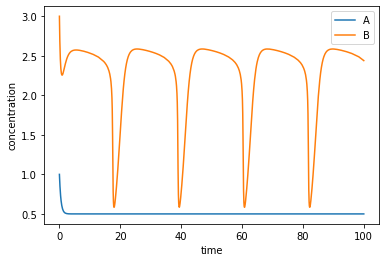

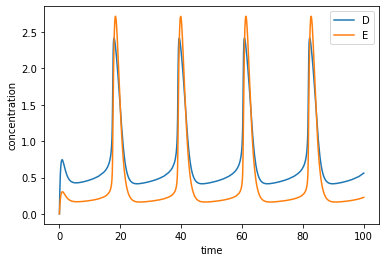

In [14]:
r1.plot('X','Y')
r1.plot('A','B')
r1.plot('D','E')

#### Interactive version
Try changing A and B inflows to see how the system responds:

In [15]:
@interact
def f(A=(0,3,0.01),B=(0,3,0.01)):
    r1.inlet(A=A, B=B, X=1, Y=1)
    r1.q=np.array((1,1,1,1,0,0))
    r1.run()

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0, step=0.01), FloatSlider(value=1.0, desc…

### Lotka–Volterra model
The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey.
https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations


In this example: $X$ - rabbits, $Y$ - foxes, $y$ - dead foxes

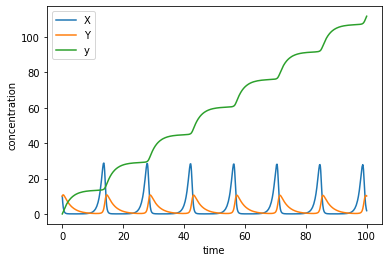

run time: 0.233s


In [16]:
cx= models.Chemistry()
cx.reaction('X=>2X', k=1.1)
cx.reaction('X+Y=>Y', k=0.4)
cx.reaction('X+Y=>2Y+X', k=0.1)
cx.reaction('Y=>y', k=0.4)
cx.initial_concentrations(X=10, Y=10)
cx.run()

In [17]:
cx.solver_params(method = 'RK23')
@interact
def f(k = (0.001, 1.5, 0.001)):
    cx.parameters[0]=k
    cx.run(plot=False)
    cx.plot('X','Y')

interactive(children=(FloatSlider(value=0.75, description='k', max=1.5, min=0.001, step=0.001), Output()), _do…